In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Heun's Trapezoid method

## Algorithm

a. Input
* **Vector Function:** $\mathbf{F}(x, \mathbf{Y})$.
* **Initial State:** $x_0, \mathbf{Y}_0$.
* **Interval:** $[x_0, X]$.
* **Step count:** $N$.

b. Output
* Sequence of vectors $\mathbf{Y}_j$ approximating the solution with local truncation error $O(h^3)$ and global error $O(h^2)$.

c. Steps
1.  **Calculate Step:** $h = (X - x_0)/N$.
2.  **Initialize:** $x_{curr} = x_0, \mathbf{Y}_{curr} = \mathbf{Y}_0$.
3.  **Loop** ($j = 0$ to $N-1$):
    * **Compute Slope 1 (Start):**
        $$\mathbf{K}_1 = \mathbf{F}(x_{curr}, \mathbf{Y}_{curr})$$
    * **Predictor Step (Euler):**
        $$\mathbf{Y}^* = \mathbf{Y}_{curr} + h \cdot \mathbf{K}_1$$
    * **Advance Time:**
        $$x_{next} = x_{curr} + h$$
    * **Compute Slope 2 (End):**
        $$\mathbf{K}_2 = \mathbf{F}(x_{next}, \mathbf{Y}^*)$$
    * **Corrector Step (Trapezoidal Rule):**
        $$\mathbf{Y}_{next} = \mathbf{Y}_{curr} + \frac{h}{2}(\mathbf{K}_1 + \mathbf{K}_2)$$
    * **Update:** $x_{curr} = x_{next}, \mathbf{Y}_{curr} = \mathbf{Y}_{next}$

In [2]:
def improved_euler_system_solver(F, x0, Y0, X_end, N):
    """
    Solves a system of ODEs using the Improved Euler (Heun's) Method.
    Formula: Y_{n+1} = Y_n + (h/2) * [F(x_n, Y_n) + F(x_{n+1}, Y*_n+1)]
    where Y*_n+1 is the predictor (standard Euler step).
    
    Parameters:
    F : function
        Vector function F(x, Y) -> returns numpy array of derivatives
    x0 : float
        Initial x
    Y0 : list/array
        Initial state vector Y
    X_end : float
        Target x
    N : int
        Number of steps
    """
    
    # 1. Setup
    h = (X_end - x0) / N
    Y_curr = np.array(Y0, dtype=float)
    x_curr = x0
    
    # Storage
    results = []
    
    # Store Initial Condition
    row = {'Step': 0, 'x': x_curr}
    for i, val in enumerate(Y_curr):
        row[f'y_{i}'] = val
    results.append(row)
    
    print(f"Improved Euler Initialized.\n Range: [{x0}, {X_end}], Steps: {N}, h: {h}")
    print("Iterating...")

    # 2. Iteration Loop
    for j in range(N):
        # --- Step A: Predictor (Standard Euler) ---
        # Calculate slope at current point (K1)
        K1 = np.array(F(x_curr, Y_curr))
        
        # Predict next value (Y_star)
        Y_star = Y_curr + h * K1
        x_next = x_curr + h
        
        # --- Step B: Corrector (Trapezoidal Rule) ---
        # Calculate slope at the predicted point (K2)
        K2 = np.array(F(x_next, Y_star))
        
        # Apply the Improved Euler formula (Eq 6.43)
        # Y_{next} = Y_{curr} + (h/2) * (K1 + K2)
        Y_next = Y_curr + (h / 2.0) * (K1 + K2)
        
        # Update state
        Y_curr = Y_next
        x_curr = x_next
        
        # Store results
        row = {'Step': j + 1, 'x': x_curr}
        for i, val in enumerate(Y_curr):
            row[f'y_{i}'] = val
        results.append(row)

    return pd.DataFrame(results)

## Result

In [3]:
# --- Usage Example: System of Equations ---

def system_derivatives(x, Y):
    y0 = Y[0] # This is y
    y1 = Y[1] # This is z
    y2 = Y[2] # This is w
    
    dy0 = 0.4*y0*(1-y0/20.0) + 0.4*y1 - 0.3*y0*y2
    dy1 = 0.7*y1*(1-y1/25.0) - 0.4*y1 - 0.4*y1*y2
    dy2 = -0.3*y2 + 0.35*(y0+y1)*y2
    
    return [dy0, dy1, dy2]

# Parameters
x_start = 0
Y_start = [12, 18, 8]  # y(0)=12, z(0)=18, w(0)=8
x_stop = 1500
steps = 15000

In [4]:
# Run Solver
df_system = improved_euler_system_solver(system_derivatives, x_start, Y_start, x_stop, steps)

# Display Result
df_system

Improved Euler Initialized.
 Range: [0, 1500], Steps: 15000, h: 0.1
Iterating...


,Step,x,y_0,y_1,y_2
0,0,0.0,12.000000,1.800000e+01,8.000000
1,1,0.1,8.921698,1.107985e+01,18.032277
2,2,0.2,4.823325,5.258085e+00,27.739349
3,3,0.3,2.364905,2.737233e+00,32.097217
4,4,0.4,1.158798,1.527066e+00,33.647788
...,...,...,...,...,...
14996,14996,1499.6,0.857108,1.273286e-135,1.276200
14997,14997,1499.7,0.857108,1.246768e-135,1.276198
14998,14998,1499.8,0.857108,1.220802e-135,1.276196
14999,14999,1499.9,0.857108,1.195378e-135,1.276195


In [5]:
## Visualize

In [6]:
def plot_solver_result(df, mode, col1='x', col2='y_0', output_file='plot.png'):
    """
    Visualizes the solver output.
    
    Parameters:
    df : pd.DataFrame
        The solution table.
    mode : int
        1 for Time Series (x vs y).
        2 for Phase Plot (y_i vs y_j).
    col1 : str
        Name of the column for the X-axis.
    col2 : str
        Name of the column for the Y-axis.
    output_file : str
        Filename to save the image.
    """
    plt.figure(figsize=(10, 6))
    
    # Plot Logic
    plt.plot(df[col1], df[col2], label=f'{col2} vs {col1}', color='navy', linewidth=2)
    
    # Formatting
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xlabel(col1, fontsize=12)
    plt.ylabel(col2, fontsize=12)
    plt.legend()
    
    if mode == 1:
        # Set the axis limits manually
        plt.xlim(-10, 250)       # Set x-axis range from 0 to 8
        #plt.ylim(-1.2, 1.2)  # Set y-axis range from -1.2 to 1.2

        plt.title(f"Mode 1: Time Series Plot ({col1} vs {col2})", fontsize=14)

    elif mode == 2:
        # Set the axis limits manually
        #plt.xlim(-10, 250)       # Set x-axis range from 0 to 8
        #plt.ylim(-1.2, 1.2)  # Set y-axis range from -1.2 to 1.2

        plt.title(f"Mode 2: Phase Plane Plot ({col1} vs {col2})", fontsize=14)

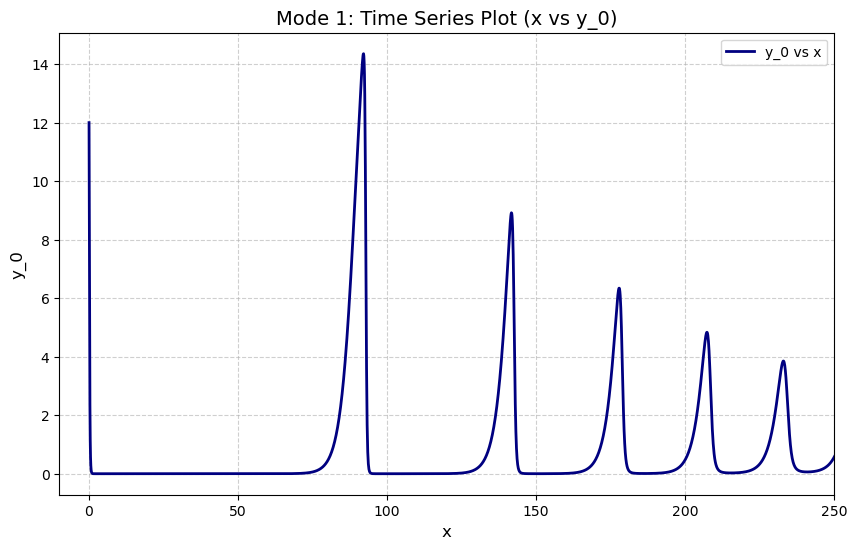

In [7]:
# 2. Plot Mode 1: x vs y_0 (Time vs Position)
plot_solver_result(df_system, mode=1, col1='x', col2='y_0')

# Higher-variant

a. Input
* **Highest Derivative Function:** $f(t, y, y', \dots, y^{(k)})$ where the problem is $y^{(k+1)} = f$.
* **Initial Vector:** $\mathbf{Y}_0 = [y(t_0), y'(t_0), \dots, y^{(k)}(t_0)]$.
* **Interval:** $[t_0, T]$.
* **Step count:** $N$.

b. Output
* A table where:
    * Column `y_deriv_0` is the solution $y(t)$.
    * Column `y_deriv_1` is the first derivative $y'(t)$.
    * ...
    * Column `y_deriv_k` is the $k$-th derivative $y^{(k)}(t)$.

c. Transformation (Reduction)
Construct a vector function $\mathbf{F}(t, \mathbf{Y})$ where $\mathbf{Y} \in \mathbb{R}^{k+1}$:
$
\mathbf{F}(t, \mathbf{Y}) = 
\begin{bmatrix} 
\mathbf{Y}[1] \\ 
\mathbf{Y}[2] \\ 
\vdots \\ 
\mathbf{Y}[k] \\ 
f(t, \mathbf{Y}[0], \mathbf{Y}[1], \dots, \mathbf{Y}[k]) 
\end{bmatrix}
$

d. Steps
1.  **Initialize:**
    * Set $t_{curr} = t_0$
    * Set $\mathbf{Y}_{curr} = \mathbf{Y}_0$
    * Calculate $h = (T - t_0)/N$

2.  **Iteration:**
    For $j = 0$ to $N-1$:
    * **Evaluate Derivatives:**
        Compute $\mathbf{D} = \mathbf{F}(t_{curr}, \mathbf{Y}_{curr})$
        *(Note: The first $k$ elements of $\mathbf{D}$ are just copies of the last $k$ elements of $\mathbf{Y}_{curr}$)*
    * **Update State:**
        $\mathbf{Y}_{next} = \mathbf{Y}_{curr} + h \cdot \mathbf{D}$
    * **Update Time:**
        $t_{next} = t_{curr} + h$
    * **Assign:**
        $\mathbf{Y}_{curr} \leftarrow \mathbf{Y}_{next}$



In [8]:
def solve_higher_order_euler(func_highest_deriv, t0, initial_conditions, t_end, N):
    """
    Solves a single y^(n) = f(...) problem by converting it to a system.
    
    Parameters:
    func_highest_deriv : function
        The function f(t, Y_vector) that returns only the value of the highest derivative.
        Y_vector contains [y, y', y'', ... y^(n-1)]
    t0 : float
        Start time
    initial_conditions : list
        Values [y(t0), y'(t0), ..., y^(n-1)(t0)]
    t_end : float
        End time
    N : int
        Steps
    """
    
    order = len(initial_conditions)
    print(f"Detecting Order-{order} Differential Equation.")
    print(f"Reducing to system of {order} first-order equations...")

    # Define the System Vector Function F(t, Y)
    # This automatically maps y -> y', y' -> y'', ..., y^(n-1) -> func(...)
    def system_wrapper(t, Y):
        # Y is [y, y', y'', ..., y^(n-1)]
        
        dY_dt = np.zeros(order)
        
        # Fill standard reduction steps: y[i]' = y[i+1]
        # Example: if order 3: dY[0] = Y[1], dY[1] = Y[2]
        for i in range(order - 1):
            dY_dt[i] = Y[i+1]
            
        # The final derivative is determined by the specific physics/math function
        dY_dt[order - 1] = func_highest_deriv(t, Y)
        
        return dY_dt

    # Call the generic system solver
    return improved_euler_system_solver(system_wrapper, t0, initial_conditions, t_end, N)

In [9]:
# --- Usage Example: ---

def highord_equation(t, Y):
    # Unpack state vector
    y0 = Y[0] # y
    y1 = Y[1] # y'
    y2 = Y[2] #y''
    y3 = (1+t*y1)*np.sin(1+y0*y1)/(float(1+y0**2+y2**2))
    return y3

# Parameters
t_start = 0
t_stop = 10
steps = 200
# Initial conditions: y(0) = 1, y'(0) = 0.5, y''(0) = -1
init_conds = [1.0, 0.5, -1.0]

In [10]:
# Run
df_result = solve_higher_order_euler(highord_equation, t_start, init_conds, t_stop, steps)

# Display
print("\nOutput Table:")
df_result

Detecting Order-3 Differential Equation.
Reducing to system of 3 first-order equations...
Improved Euler Initialized.
 Range: [0, 10], Steps: 200, h: 0.05
Iterating...

Output Table:


,Step,x,y_0,y_1,y_2
0,0,0.00,1.000000,0.500000,-1.000000
1,1,0.05,1.023750,0.450416,-0.983267
2,2,0.10,1.045042,0.401674,-0.966351
3,3,0.15,1.063917,0.353781,-0.949347
4,4,0.20,1.080420,0.306739,-0.932350
...,...,...,...,...,...
196,196,9.80,-46.391902,-11.051959,-1.276341
197,197,9.85,-46.946096,-11.115714,-1.276290
198,198,9.90,-47.503477,-11.179588,-1.276393
199,199,9.95,-48.064052,-11.243353,-1.276319
